In [43]:
import pandas as pd
import numpy as np

data = pd.read_excel(r'E:\pycharm\topic_classification\boss_1.xlsx')


# 使用 size() 统计每个 '公司领域' 的行数
group_bytype = data.groupby('公司领域').size().reset_index(name='行数')

# 打印结果

group_bytype = group_bytype[group_bytype['行数']>10]
group_bytype = group_bytype.sort_values(by='行数',ascending=False)
group_bytype

,公司领域,行数
2,互联网,99
26,咨询,59
85,计算机软件,37
74,电子商务,37
29,培训/辅导机构,32
28,在线教育,23
3,互联网金融,21
39,广告/公关/会展,19
51,文化艺术/娱乐,17
9,企业服务,16


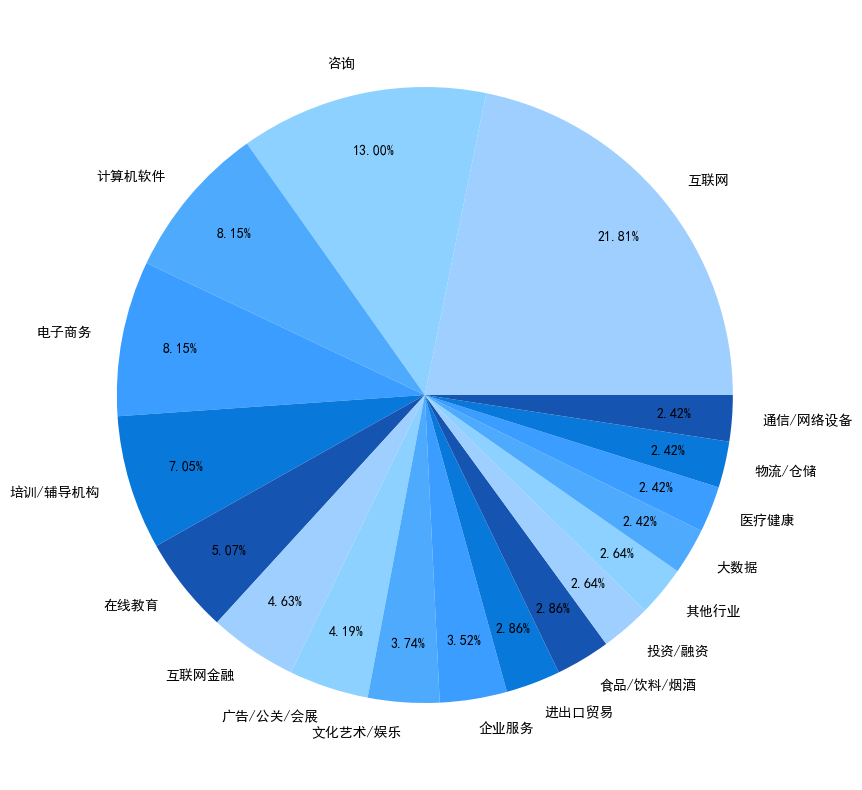

In [31]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
labels = list(group_bytype['公司领域'])
x = list(group_bytype['行数'])
colors = ['#9ECFFF','#8CD1FF','#4DAAFC','#3A9DFF','#0878DA','#1654B2']
plt.figure(figsize=(10,10))
plt.pie(x,labels = labels,autopct = '%1.2f%%',colors = colors,pctdistance=0.81)
plt.show()

In [34]:
# 使用 size() 统计每个 '公司领域' 的行数
group_scale = data.groupby('公司规模').size().reset_index(name='行数')

# 打印结果

# group_scale =group_scale[group_bytype['行数']>10]
group_scale = group_scale.sort_values(by='行数',ascending=False)
group_scale

,公司规模,行数
4,20-99人,234
1,100-499人,184
2,1000-9999人,99
0,0-20人,80
3,10000人以上,75
5,500-999人,73


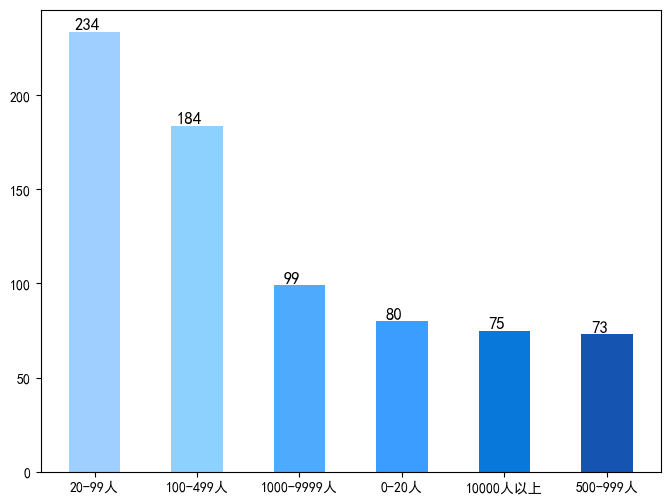

In [54]:
labels = list(group_scale['公司规模'])
x = list(group_scale['行数'])
x_arange = np.arange(len(labels))
colors = ['#9ECFFF','#8CD1FF','#4DAAFC','#3A9DFF','#0878DA','#1654B2']
bar_width = 0.35
plt.subplots(figsize=(8,6))
plt.bar(labels,x,color=colors,width=0.5)
#给每个柱子上面添加标注
for x_, score_ in zip(x_arange, x):
    plt.text(x_ - bar_width / 2+0.1, score_ + 1, score_, ha='center', fontsize=12)

plt.show()

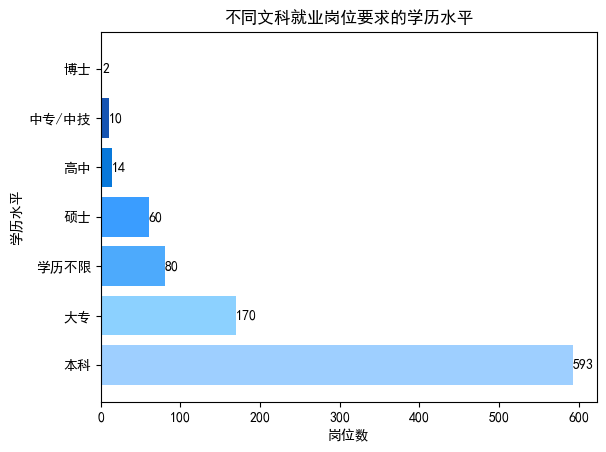

In [57]:
#对学历要求进行可视化
g_degree = data.groupby('学历').size().reset_index(name='行数')
g_degree = g_degree.sort_values(by='行数',ascending=False)
g_degree

categories = g_degree['学历']
values = g_degree['行数']
colors = ['#9ECFFF','#8CD1FF','#4DAAFC','#3A9DFF','#0878DA','#1654B2']
# 创建横向条形图
plt.barh(categories, values, color=colors)

# 添加标签和标题
plt.xlabel('岗位数')
plt.ylabel('学历水平')
plt.title('不同文科就业岗位要求的学历水平')

# 在每个条形上方添加值的标签
for index, value in enumerate(values):
    plt.text(value, index, str(value), va='center')

# 显示图形
plt.show()

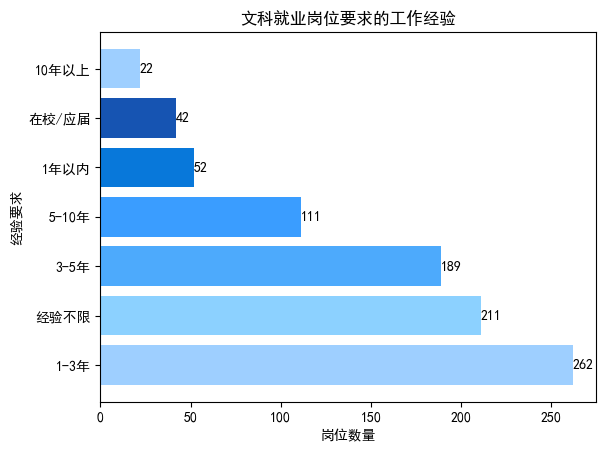

In [70]:
#对经验的要求可视化
g_degree = data.groupby('经验要求').size().reset_index(name='行数')
g_degree = g_degree.sort_values(by='行数',ascending=False)
g_degree =g_degree[g_degree['行数']>10]
g_degree

categories = g_degree['经验要求']
values = g_degree['行数']
colors = ['#9ECFFF','#8CD1FF','#4DAAFC','#3A9DFF','#0878DA','#1654B2']
# 创建横向条形图
plt.barh(categories, values, color=colors)

# 添加标签和标题
plt.xlabel('岗位数量')
plt.ylabel('经验要求')
plt.title('文科就业岗位要求的工作经验')

# 在每个条形上方添加值的标签
for index, value in enumerate(values):
    plt.text(value, index, str(value), va='center')

# 显示图形
plt.show()

In [67]:
import re
pattern = r'^\d+-\d+K(?:·\d+薪)?$'
filtered_df = data[data['工资'].str.match(pattern)]

# 输出结果
filtered_df.tail()

def convert_salary(salary_str):
    # 匹配带有 13 薪的情况
    match = re.match(r'(\d+)-(\d+)K(?:·(\d+)薪)?', salary_str)
    if match:
        low, high = int(match.group(1)), int(match.group(2))
        # 计算平均工资
        average_salary = (low + high) * 1000/2 # 转换为月薪
        # 如果有 13 薪的情况，增加额外的一个月薪水
        if match.group(3):
            month = int(match.group(3))
            average_salary = (low + high) * 1000/2 *(month/ 12)   # 每年增加一个月的薪水
        return average_salary
    return None  # 对于不符合格式的数据，返回 None

# 应用函数转换薪水
filtered_df['monthly_salary'] = filtered_df['工资'].apply(convert_salary)

filtered_df.to_excel(r'E:\pycharm\topic_classification\boss_薪资变化.xlsx',index=False)

C:\Users\86152\AppData\Local\Temp\ipykernel_24036\3525678683.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['monthly_salary'] = filtered_df['工资'].apply(convert_salary)


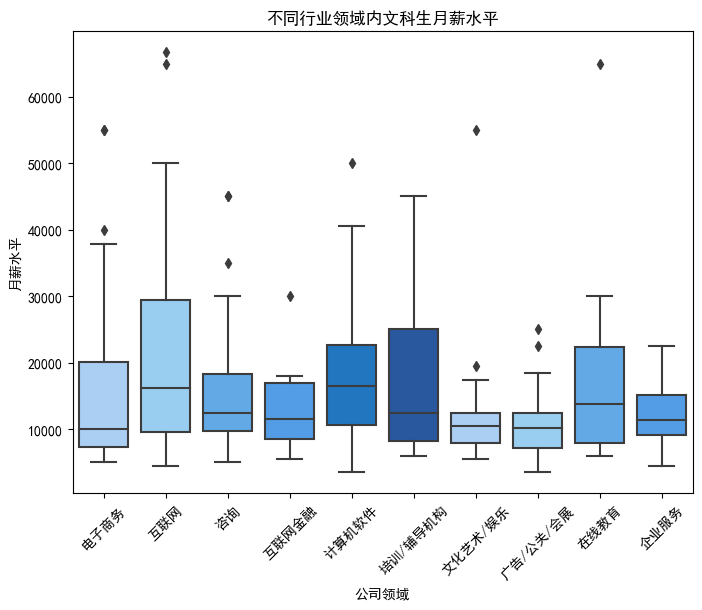

In [90]:
df = pd.read_excel(r'E:\pycharm\topic_classification\boss_薪资变化.xlsx')
df = df[['公司领域','monthly_salary']]  
df = df[df['monthly_salary']<100000]  #删除太极端的值
colors = ['#9ECFFF','#8CD1FF','#4DAAFC','#3A9DFF','#0878DA','#1654B2']
df.dropna()
# 设置最小数据量阈值
min_count = 15  # 例如，至少需要3条记录
# 筛选出数据量大于阈值的公司领域
df = df.groupby('公司领域').filter(lambda x: len(x) >= min_count)
plt.figure(figsize=(8, 6))  # 设置图形大小
sns.boxplot(x='公司领域', y='monthly_salary', data=df,palette=colors)
plt.xticks(rotation=45) 
# 添加标题和标签
plt.title('不同行业领域内文科生月薪水平')
plt.xlabel('公司领域')
plt.ylabel('月薪水平')

# 显示图形
plt.show()



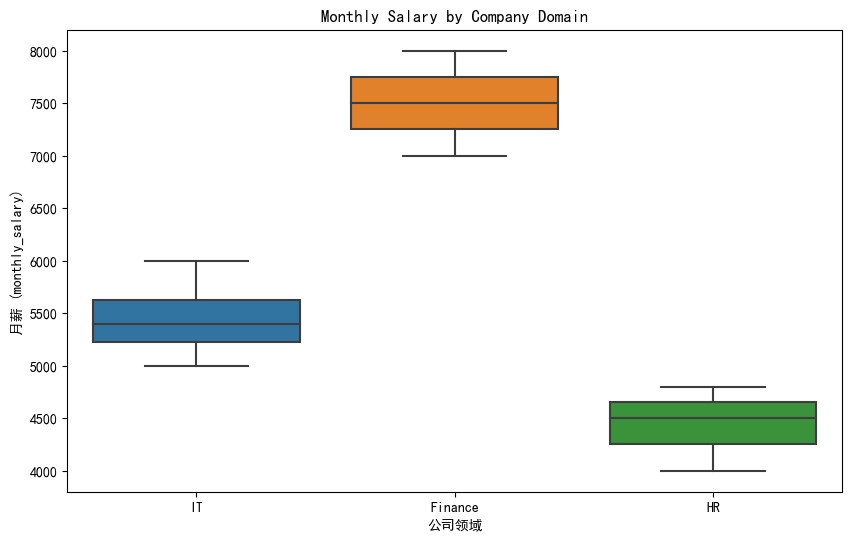

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 创建示例数据
data = {
    '公司领域': ['IT', 'IT', 'Finance', 'Finance', 'HR', 'HR', 'IT', 'Finance', 'HR', 'IT'],
    'monthly_salary': [5000, 6000, 7000, 7500, 4000, 4500, 5500, 8000, 4800, 5300]
}

df = pd.DataFrame(data)

# 绘制箱线图
plt.figure(figsize=(10, 6))  # 设置图形大小
sns.boxplot(x='公司领域', y='monthly_salary', data=df)

# 添加标题和标签
plt.title('Monthly Salary by Company Domain')
plt.xlabel('公司领域')
plt.ylabel('月薪 (monthly_salary)')

# 显示图形
plt.show()


In [3]:
data_new = pd.DataFrame()

In [8]:
'''前面的一些分析是：招聘企业现状  招聘企业的基础性要求分析  还差一个工资水平的箱线图'''
'''接着我们要分析的是：企业规模、领域与行业经验要求、学历要求的一个关系'''
#数据的重编码+pearon卡方检验
import pandas as pd
import numpy as np


data = pd.read_excel(r'E:\pycharm\topic_classification\boss_1.xlsx')
#由于时间紧任务重就写代码
def process(list_):
    label = set()
    content_dict = {}
    num = 1
    for i in range(len(list_)):
        if list_[i] in label:
            list_[i] = content_dict[list_[i]]
        else:
            label.add(list_[i])
            content_dict[list_[i]] = num
            list_[i] = content_dict[list_[i]]
            num = num+1
    return content_dict,list_

statement = {}
list_ = []
data_adjob = list(data['经验要求'])
statement,list_ = process(data_adjob)
print(statement)
print(list_)

data_new['experience'] = data_adjob



{'1-3年': 1, '3-5年': 2, '5-10年': 3, '经验不限': 4, '在校/应届': 5, '1年以内': 6, '3天/周 3个月': 7, '10年以上': 8, '4天/周 3个月': 9, '5天/周 4个月': 10, '5天/周 6个月': 11, '4天/周 6个月': 12, '5天/周 3个月': 13, '应届生': 14, '3天/周 12个月': 15, '4天/周 2个月': 16, '5天/周 1个月': 17, '3天/周 2个月': 18, '5天/周 7个月': 19, '4天/周 4个月': 20, '4天/周 1个月': 21}
[1, 2, 1, 3, 2, 4, 4, 4, 1, 3, 2, 1, 1, 3, 1, 2, 1, 1, 1, 2, 5, 3, 3, 3, 2, 3, 4, 1, 3, 3, 1, 1, 3, 3, 1, 2, 1, 2, 1, 3, 1, 2, 2, 1, 4, 3, 3, 1, 1, 4, 4, 1, 3, 5, 4, 3, 6, 1, 1, 1, 1, 2, 3, 4, 5, 2, 1, 2, 1, 1, 2, 6, 1, 1, 2, 6, 1, 7, 1, 4, 1, 2, 1, 2, 3, 2, 1, 3, 3, 4, 4, 1, 6, 3, 4, 1, 4, 8, 4, 1, 2, 6, 4, 4, 4, 6, 1, 1, 4, 2, 4, 9, 4, 1, 4, 7, 6, 3, 2, 2, 2, 1, 3, 1, 2, 4, 3, 1, 2, 2, 2, 1, 10, 1, 2, 2, 1, 2, 3, 2, 2, 6, 2, 2, 2, 1, 1, 1, 2, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 5, 6, 4, 1, 4, 1, 1, 2, 1, 2, 1, 4, 1, 2, 1, 1, 1, 3, 4, 4, 2, 1, 5, 2, 2, 1, 6, 1, 1, 4, 2, 1, 4, 3, 1, 11, 1, 4, 2, 1, 1, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 5, 4, 6, 4, 4, 6, 4, 4, 2, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4,

In [145]:

# df = df.drop('type', axis=1)
# data_new.to_excel(r'E:\pycharm\topic_classification\boss_分类变量.xlsx',index=False)

['type', 'scale', 'job', 'degree', 'experience']


In [15]:
data_new

grouped = data_new.groupby('experience')['type'].value_counts(normalize=True).unstack()
grouped

type,1,2,3,4,5,6,7
experience,,,,,,,
1,0.064885,0.045802,0.221374,0.297710,0.068702,0.198473,0.103053
2,0.105820,0.089947,0.195767,0.238095,0.095238,0.201058,0.074074
3,0.162162,0.126126,0.171171,0.216216,0.099099,0.171171,0.054054
4,0.109005,0.099526,0.180095,0.279621,0.056872,0.180095,0.094787
5,0.119048,0.119048,0.142857,0.119048,0.119048,0.357143,0.023810
6,0.076923,0.019231,0.211538,0.269231,0.057692,0.211538,0.153846
7,NaN,NaN,0.200000,0.200000,NaN,0.400000,0.200000
8,0.136364,NaN,0.318182,0.181818,0.045455,0.227273,0.090909
9,0.428571,NaN,0.285714,NaN,NaN,0.285714,NaN


In [ ]:
data_new.columns = data_new.columns.str.strip()  # 去掉多余的空格
data_new
data_new.columns = ['type','scale','job','degree','experience']
data_new
print([col for col in data_new.columns])
import seaborn as sns
from scipy.stats import chi2_contingency


def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# 初始化相关性矩阵
cols = data_new.columns
corr_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)

# 循环计算每对分类变量之间的Cramér's V
print(data_new.columns)
for col1 in cols:
    for col2 in cols:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1.0  # 自相关为1
        else:
            # 计算列联表
            confusion_matrix = pd.crosstab(data_new[col1], data_new[col2])
            # 计算Cramér's V
            corr_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# 设置绘图风格
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={'label': 'Cramér\'s V'})
plt.title("Cramér's V Correlation Heatmap")
plt.show()


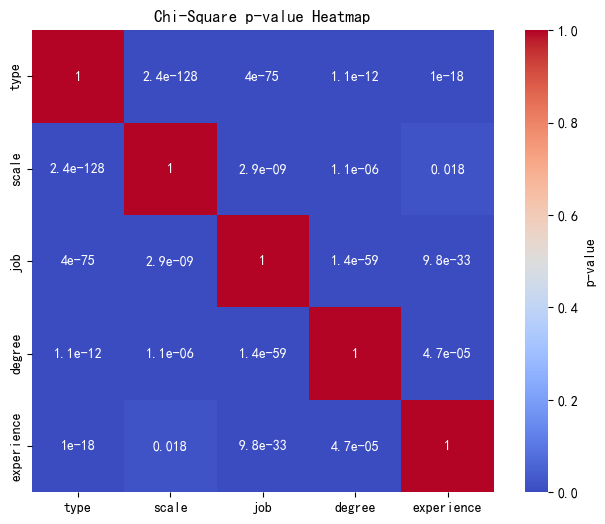

In [151]:
df = pd.DataFrame()
df = data_new
# 初始化 p 值矩阵
p_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)

# 循环计算每对分类变量的卡方检验 p 值
for col1 in cols:
    for col2 in cols:
        if col1 == col2:
            p_matrix.loc[col1, col2] = 1.0
        else:
            # 计算列联表
            confusion_matrix = pd.crosstab(data_new[col1], data_new[col2])
            # 计算卡方检验的 p 值
            chi2, p, dof, ex = chi2_contingency(confusion_matrix)
            p_matrix.loc[col1, col2] = p

# 设置绘图风格并可视化 p 值
plt.figure(figsize=(8, 6))
sns.heatmap(p_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={'label': 'p-value'})
plt.title("Chi-Square p-value Heatmap")
plt.show()
